In [1]:
#import lib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the file
data=pd.read_csv('G:\SampleSuperstore.csv')

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#Drop postle code that dosnt provide any data analysis 

data=data.drop(columns='Postal Code', axis=1)
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [6]:
#Check if is there any missing value
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#check fo the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [8]:
#return as summary of stats to the data frame column
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


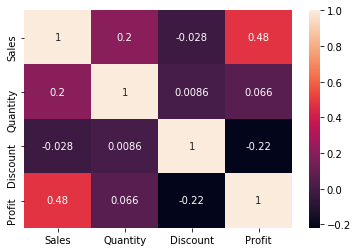

In [10]:
#Calculate the heat map to check association of each variable
sns.heatmap(data.corr(), annot=True)

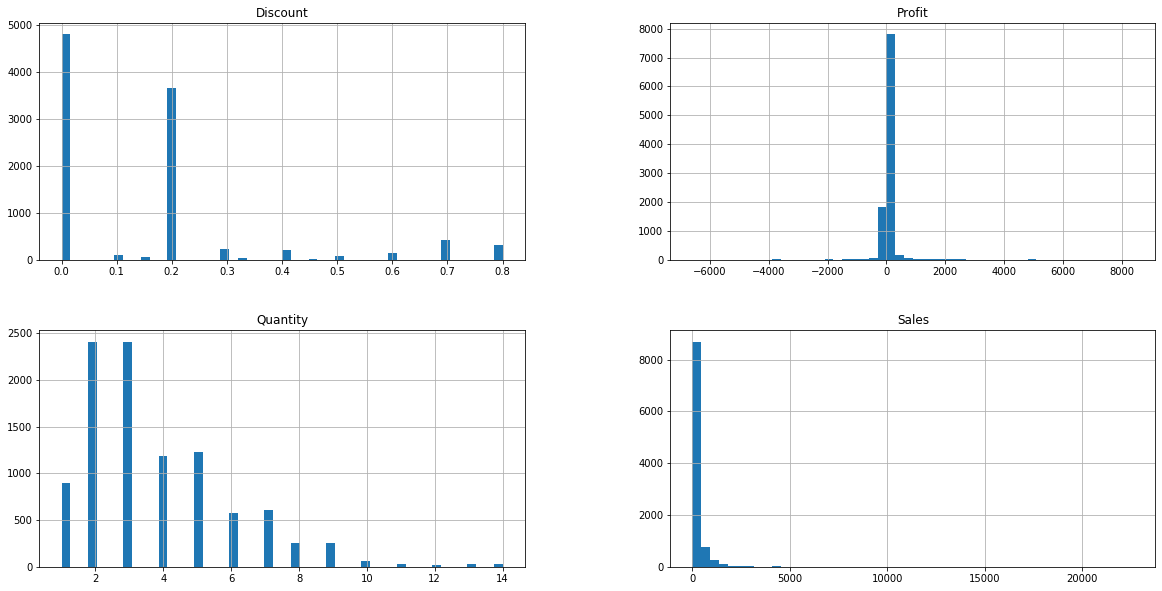

In [14]:
#Data visualization
data.hist(bins=50,figsize=(20,10))
plt.show()

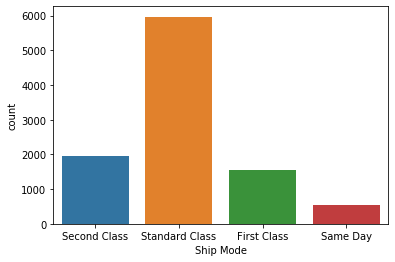

In [17]:
#plot a graph based on the category of the shipment
import seaborn as sns
sns.countplot(x=data['Ship Mode'])

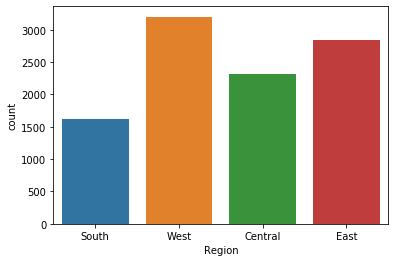

In [18]:
#plot a graph based on region
sns.countplot(x=data['Region'])

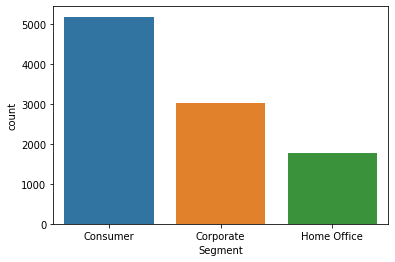

In [19]:
#plot a graph based on the Segment
sns.countplot(x=data['Segment'])

Text(0.5, 0.98, 'Pie Cunsumption pattern in united states')

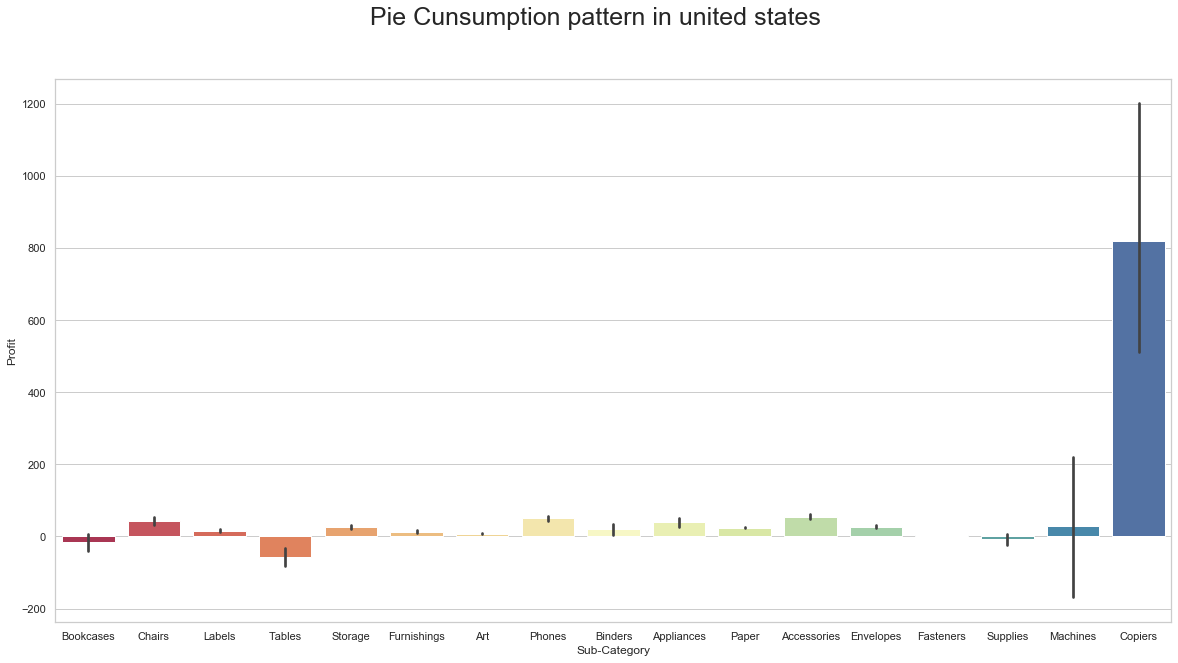

In [24]:
#We create a barplot to check the profit and loss incurred for each of the item
sns.set(style='whitegrid')
plt.figure(2, figsize=(20,10))

sns.barplot(x='Sub-Category', y='Profit',data=data, palette='Spectral')

plt.suptitle('Pie Cunsumption pattern in united states', fontsize=25)

# This barplot does not give an clear distribution of profit and loss although it seems clear that table bookcases and supplies and suffering from losses.
# Create more  concise view below

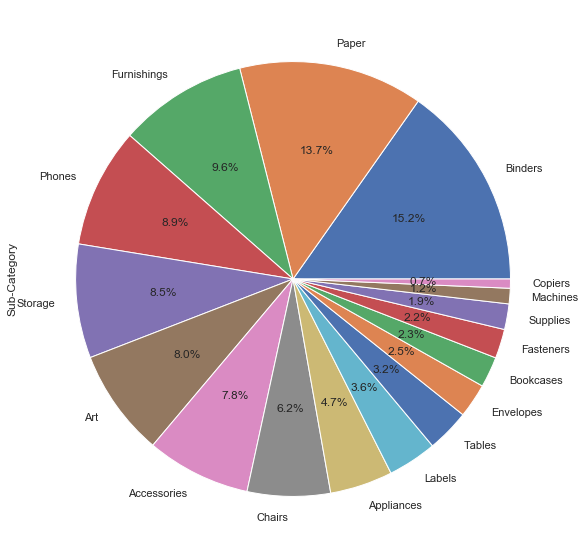

In [26]:

plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

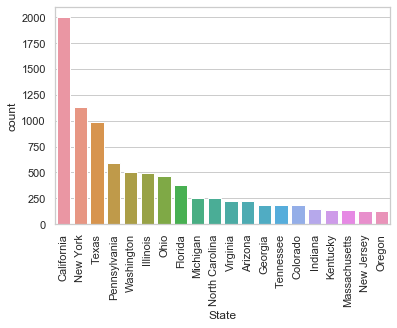

In [27]:
sns.countplot(x=data['State'], order=data['State'].value_counts().head(20).index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

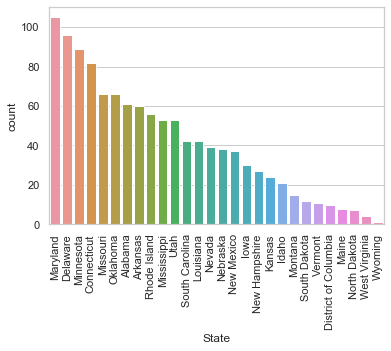

In [30]:
#Lets check for 27 states
sns.countplot(x=data['State'], order=(data['State'].value_counts().tail(28)).index)
plt.xticks(rotation=90)

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

<Figure size 2880x2880 with 0 Axes>

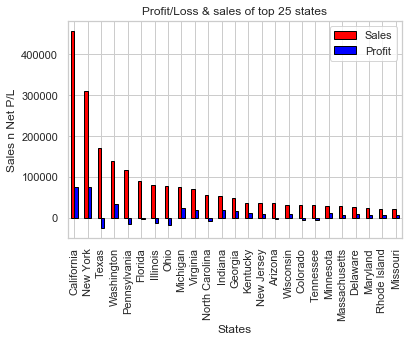

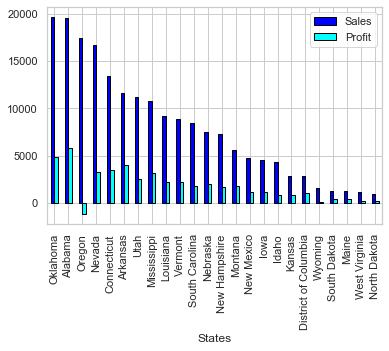

In [32]:
states=data.groupby("State")[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
plt.figure(figsize=(40,40))
states[:25].plot(kind='bar',edgecolor="#000000",color=['red','blue'])
plt.title("Profit/Loss & sales of top 25 states")
plt.xlabel('States')
plt.ylabel('Sales n Net P/L')
plt.grid(True)
states[25:].plot(kind='bar',edgecolor="#000000",color=['blue','cyan'])
plt.title=("P/L & Sales of bottom 25 states")
plt.xlabel('States')
plt.ylable('Sales n Net P/L')
plt.grid(True)

C:\Panda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


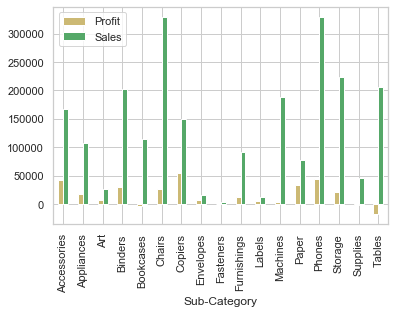

In [33]:
data.groupby('Sub-Category')['Profit','Sales'].sum().plot.bar(color=['y','g'])

In [34]:
pd.DataFrame(data.groupby('State').sum())['Profit'].sort_values(ascending=True)

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [35]:
pd.DataFrame(data.groupby('State').sum())['Discount'].sort_values(ascending=True)

State
Alabama                   0.00
Missouri                  0.00
Maine                     0.00
Louisiana                 0.00
Kentucky                  0.00
Kansas                    0.00
Iowa                      0.00
Indiana                   0.00
Wisconsin                 0.00
Mississippi               0.00
Nebraska                  0.00
North Dakota              0.00
District of Columbia      0.00
Oklahoma                  0.00
South Carolina            0.00
South Dakota              0.00
Vermont                   0.00
Arkansas                  0.00
Virginia                  0.00
Georgia                   0.00
Minnesota                 0.00
Wyoming                   0.20
West Virginia             0.30
New Hampshire             0.30
Maryland                  0.60
Connecticut               0.60
New Jersey                0.60
Delaware                  0.60
Montana                   1.00
Rhode Island              1.20
Idaho                     1.80
Michigan                  1.80
Ma

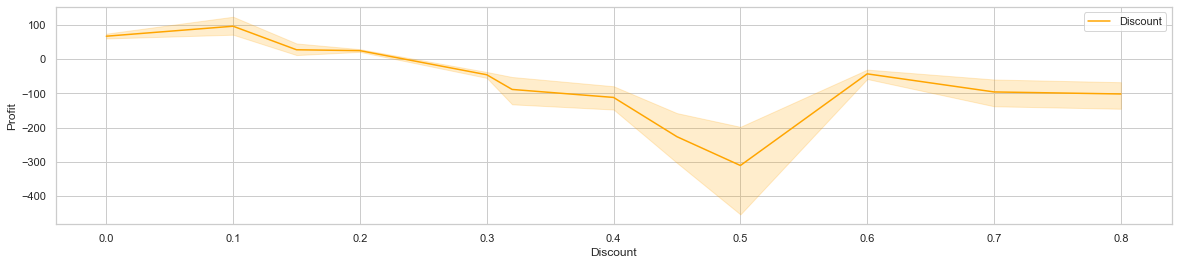

In [39]:
plt.figure(figsize=(20,4))
sns.lineplot('Discount','Profit',data=data, color='orange', label='Discount')
plt.legend()